# DX 602 Final Project

## Introduction

In this project, you will practice the skills that you have learned throughout this module with a heavy focus on building models.
Most of the problems and questions are open ended compared to your previous homeworks, and you will be asked to explain your choices.
Most of them will have a particular type of solution implied, but it is up to you to figure out the details based on what you have learned in this module.

## Instructions

Each problem asks you to perform build models, run a computation, or otherwise perform some analysis of the data, and usually answer some questions about the results.
Make sure that your question answers are well supported by your analysis and explanations; simply stating an answer without support will earn minimal points.

Notebook cells for code and text have been added for your convenience, but feel free to add additional cells.

## Example Code

You may find it helpful to refer to this GitHub repository of Jupyter notebooks for example code.

* https://github.com/bu-cds-omds/dx601-examples
* https://github.com/bu-cds-omds/dx602-examples

Any calculations demonstrated in code examples or videos may be found in these notebooks, and you are allowed to copy this example code in your homework answers.

## Submission

This project will be entirely manually graded.
However, we may rerun some or all of your code to confirm that it works as described.

### Late Policy

The normal homework late policy for OMDS does not apply to this project.
Boston University requires final grades to be submitted within 72 hours of class instruction ending, so we cannot accommodate 5 days of late submissions.

However, we have delayed the due date of this project to be substantially later than necessary given its scope, and given you more days for submission with full credit than you would have had days for submission with partial credit under the homework late policy.
The Thanksgiving holiday was also taken into account in setting the deadline.
Finally, the deadlines for DX 601 and DX 602 were coordinated to be a week apart while giving ample time for both of their projects.

## Shared Imports

For this project, you are forbidden to use modules that were not loaded in this template.
While other modules are handy in practice, modules that trivialize these problems interfere with our assessment of your own knowledge and skills.

If you believe a module covered in the course material (not live sessions) is missing, please check with your learning facilitator.

In [32]:
import math
import sys

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import sklearn.linear_model

## Problems

### Problem 1 (5 points)

Pick one of the following data sets to analyze in this project.
Load the data set, and show a random sample of 10 rows.

* [Wine Quality](https://archive.ics.uci.edu/dataset/186/wine+quality) ([PMLB - red subset only](https://github.com/EpistasisLab/pmlb/tree/master/datasets/wine_quality_red))
* [Body Fat](https://www.openml.org/search?type=data&status=active&id=560) ([PMLB](https://github.com/EpistasisLab/pmlb/tree/master/datasets/560_bodyfat))

The PMLB copies of the data are generally cleaner and recommended for this project, but the other links are provided to give you more context.
To load the data from the PMLB Github repository, navigate to the `.tsv.gz` file in GitHub and copy the link from the "Raw" button.

If the dataset has missing data, you should drop the rows with missing data before proceeding.
If the data set you choose has more than ten columns, you may limit later analysis that is requested per column to just the first ten columns.

In [34]:
# YOUR CODE HERE
datasource= "https://github.com/EpistasisLab/pmlb/raw/refs/heads/master/datasets/wine_quality_red/wine_quality_red.tsv.gz"

df_redWine = pd.read_csv(datasource, sep='\t') #loading red wine dataset
df_redWine.sample(10, random_state=42) #printing random sample of 10 rows



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
803,7.7,0.56,0.08,2.50,0.114,14.0,46.0,0.99710,3.24,0.66,9.6,6
124,7.8,0.50,0.17,1.60,0.082,21.0,102.0,0.99600,3.39,0.48,9.5,5
350,10.7,0.67,0.22,2.70,0.107,17.0,34.0,1.00040,3.28,0.98,9.9,6
682,8.5,0.46,0.31,2.25,0.078,32.0,58.0,0.99800,3.33,0.54,9.8,5
1326,6.7,0.46,0.24,1.70,0.077,18.0,34.0,0.99480,3.39,0.60,10.6,6
976,7.2,0.41,0.30,2.10,0.083,35.0,72.0,0.99700,3.44,0.52,9.4,5
1493,7.7,0.54,0.26,1.90,0.089,23.0,147.0,0.99636,3.26,0.59,9.7,5
706,7.0,0.78,0.08,2.00,0.093,10.0,19.0,0.99560,3.40,0.47,10.0,5
613,8.2,0.39,0.38,1.50,0.058,10.0,29.0,0.99620,3.26,0.74,9.8,5
1587,5.8,0.61,0.11,1.80,0.066,18.0,28.0,0.99483,3.55,0.66,10.9,6


YOUR ANSWERS HERE

### Problem 2 (10 points)

List all of the columns and describe them in your own words.

In [35]:
# YOUR CODE HERE
#List of the columns
list[df_redWine.columns]

list[Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'target'],
      dtype='object')]

YOUR ANSWERS HERE

Description of columns:

fixed acidity: Refers to non-volatile acid amount(ex. malic, tartatic etc.).It is needed for wine's flavour, balance and preservation. Type=continuous

volatile acidity: Amount of volatile acid(ex. acetic acid). Excessive amount makes wine vinegary.Type=continuous

citric acid: This acid is added to improve freshness and flavour.Type=continuous

residual sugar: left over suger after fermentation. It influences sweetness of wines. Type=continuous

chlorides: Salt like compounds in wine, higher concentration will give salty taste in wine. Type=continuous

free sulfur dioxide: Chemically not bound substancehelps is wine preservation by preventing oxidation and microbial growths.Type=continuous

total sulfur dioxide: Free and bound SO2 helps in wine preservation. Type=continuous

density: Density of wine. It correlates suger and alcohol. Type=continuous

ph: To measure acidity or basicity of the wine. It indicates preservation and stability in wine.Type=continuous

sulphates: Sulphate concentration helps with wine preservation, oxidation and taste. Type=continuous

alcohol: Percenage of alcohol influences wine's body, taste and preservation. Type=continuous

target: A score given by wine experts based on overall assessment of taste, balance and aroma. Type = Integer

### Problem 3 (50 points)

Perform an exploratory analysis of the data set.
After your exploratory analysis, pick 3 individual charts that you the think were particularly interesting.
Repeat those charts separately from your original analysis, and after each of those charts, explain what you thought was noteworthy.

(1599, 12)
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfu

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000



 Missing values in columns
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
target                  0
dtype: int64

 Duplicate values
240


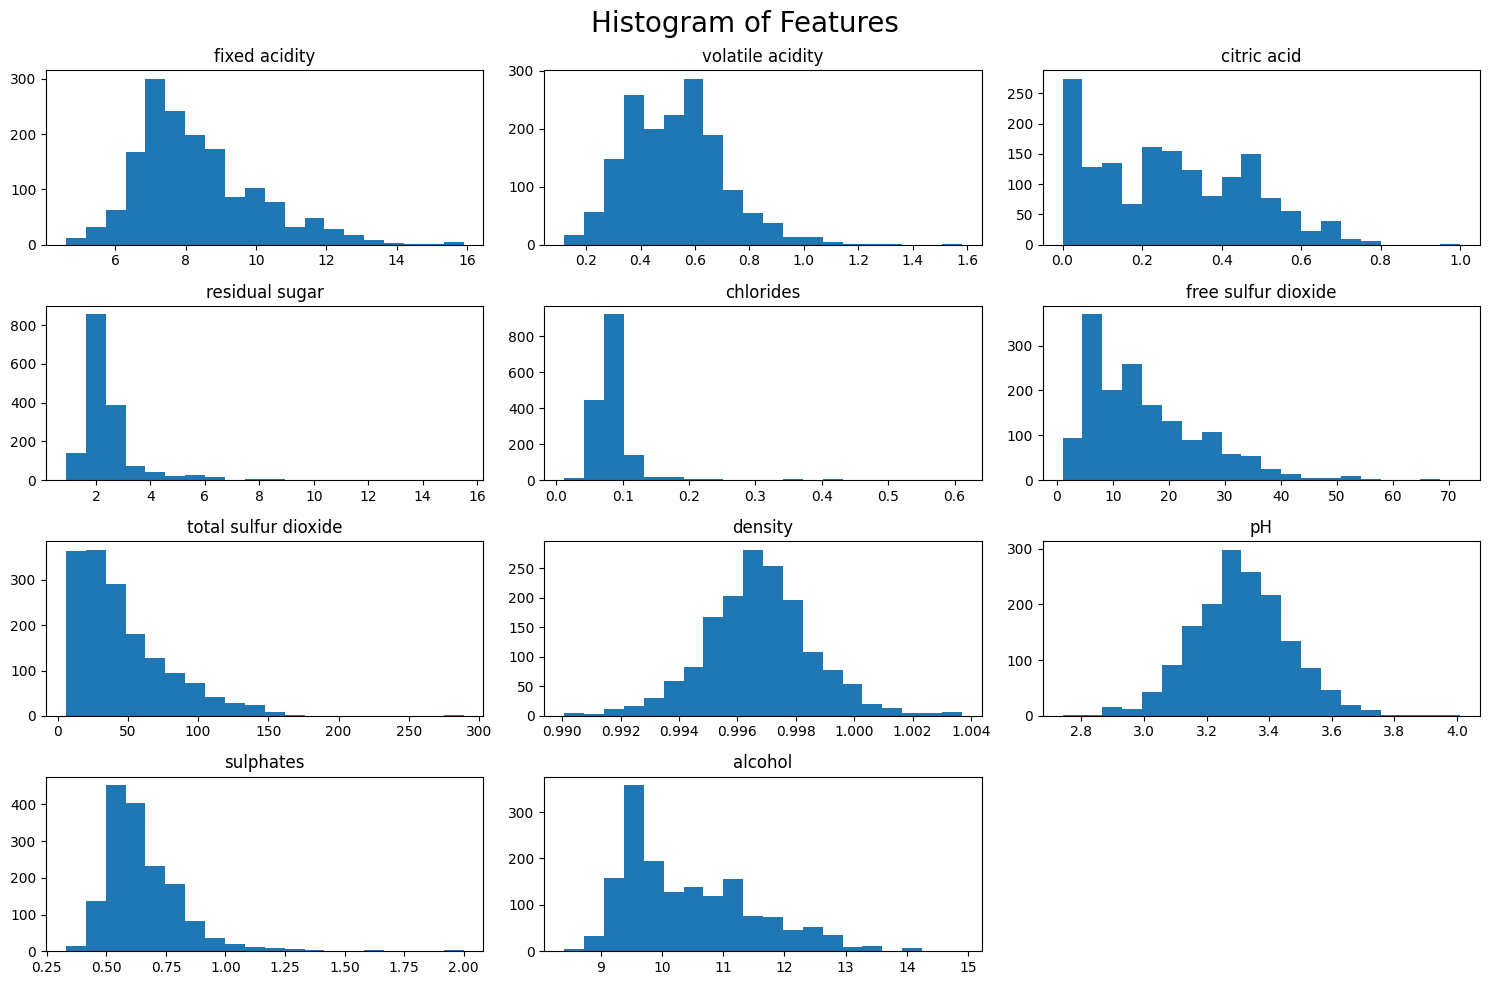

Scatterplot of features vs target


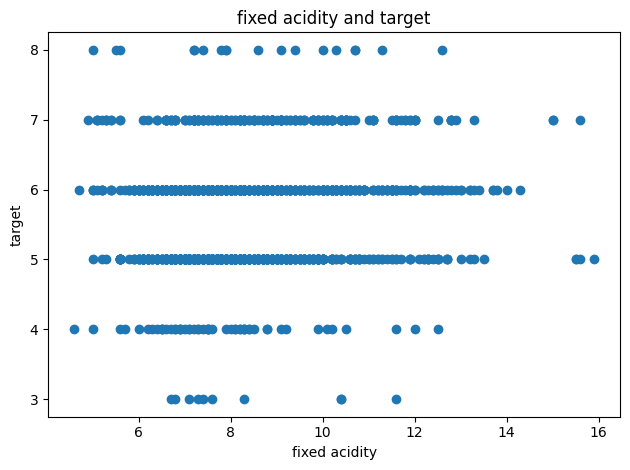

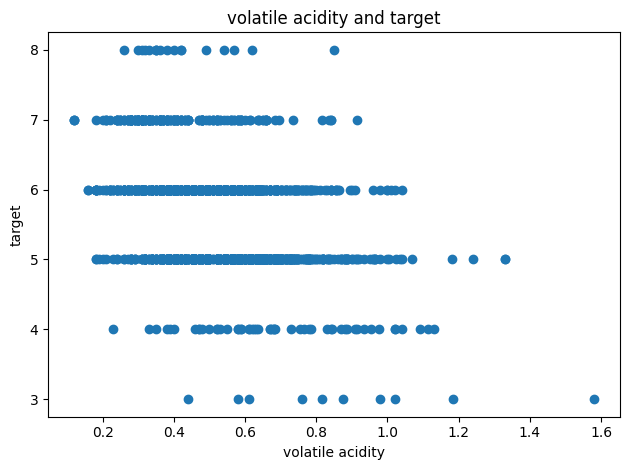

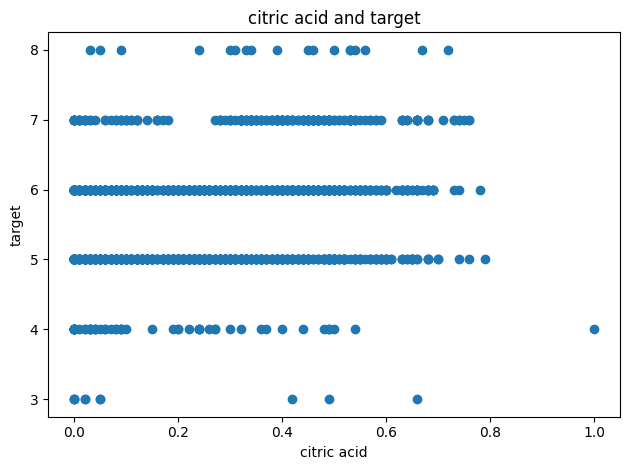

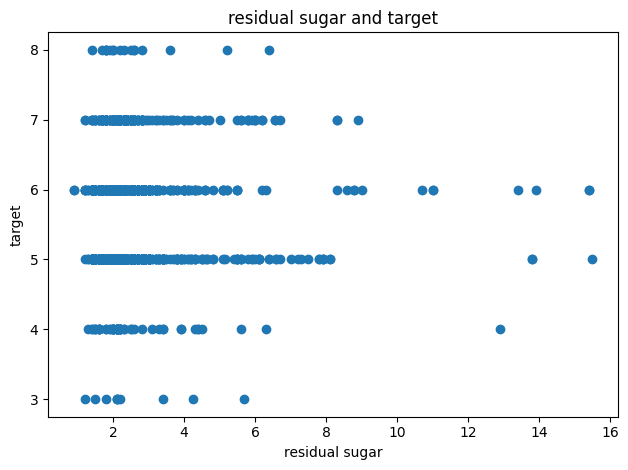

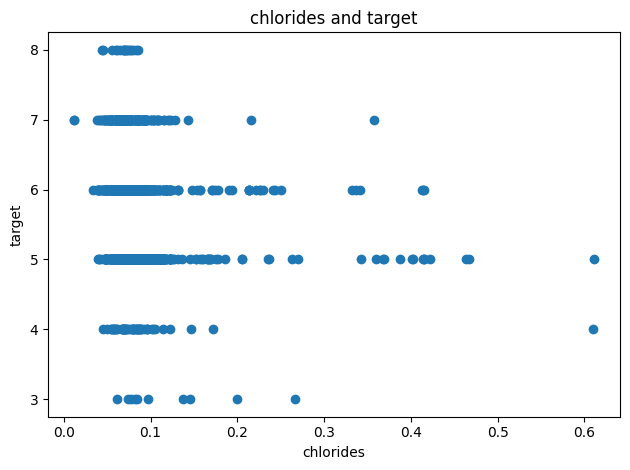

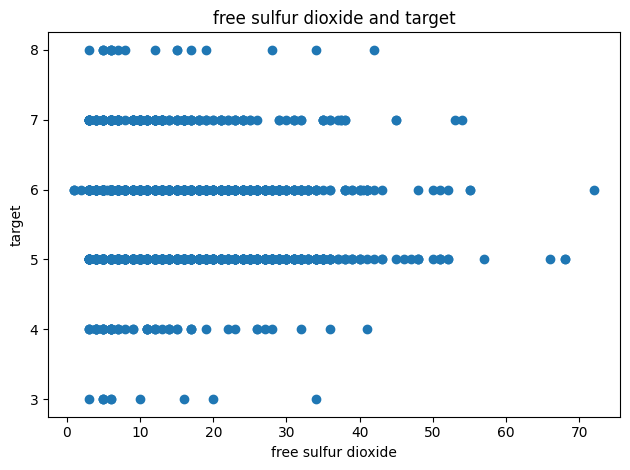

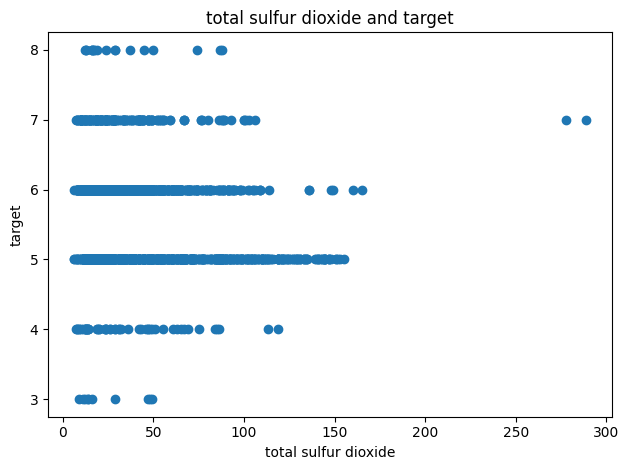

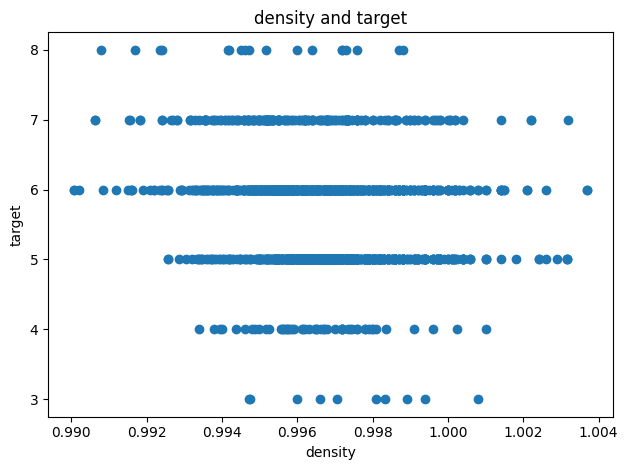

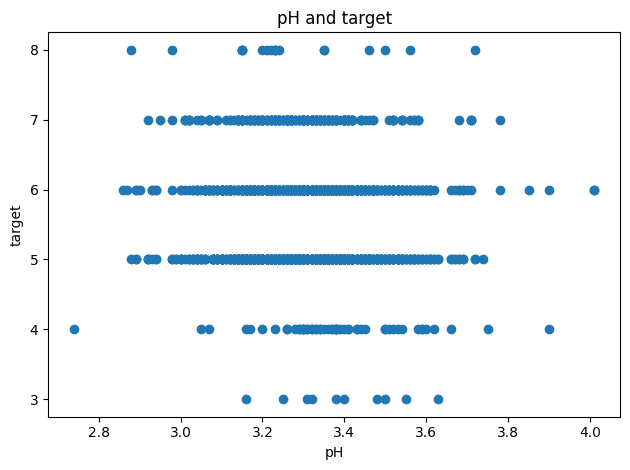

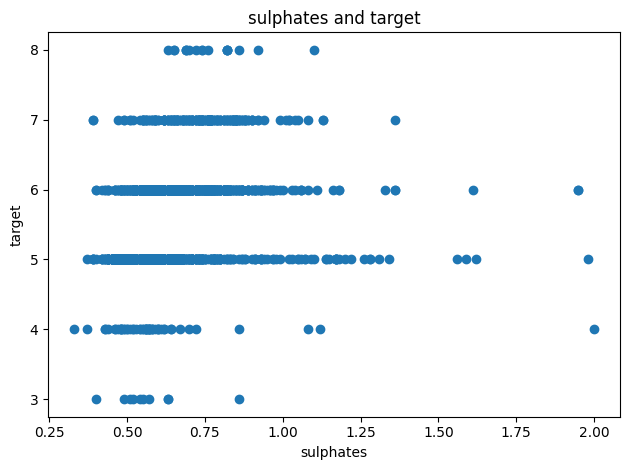

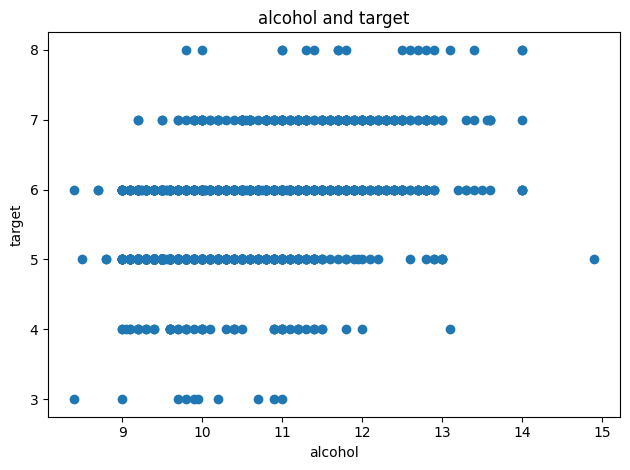

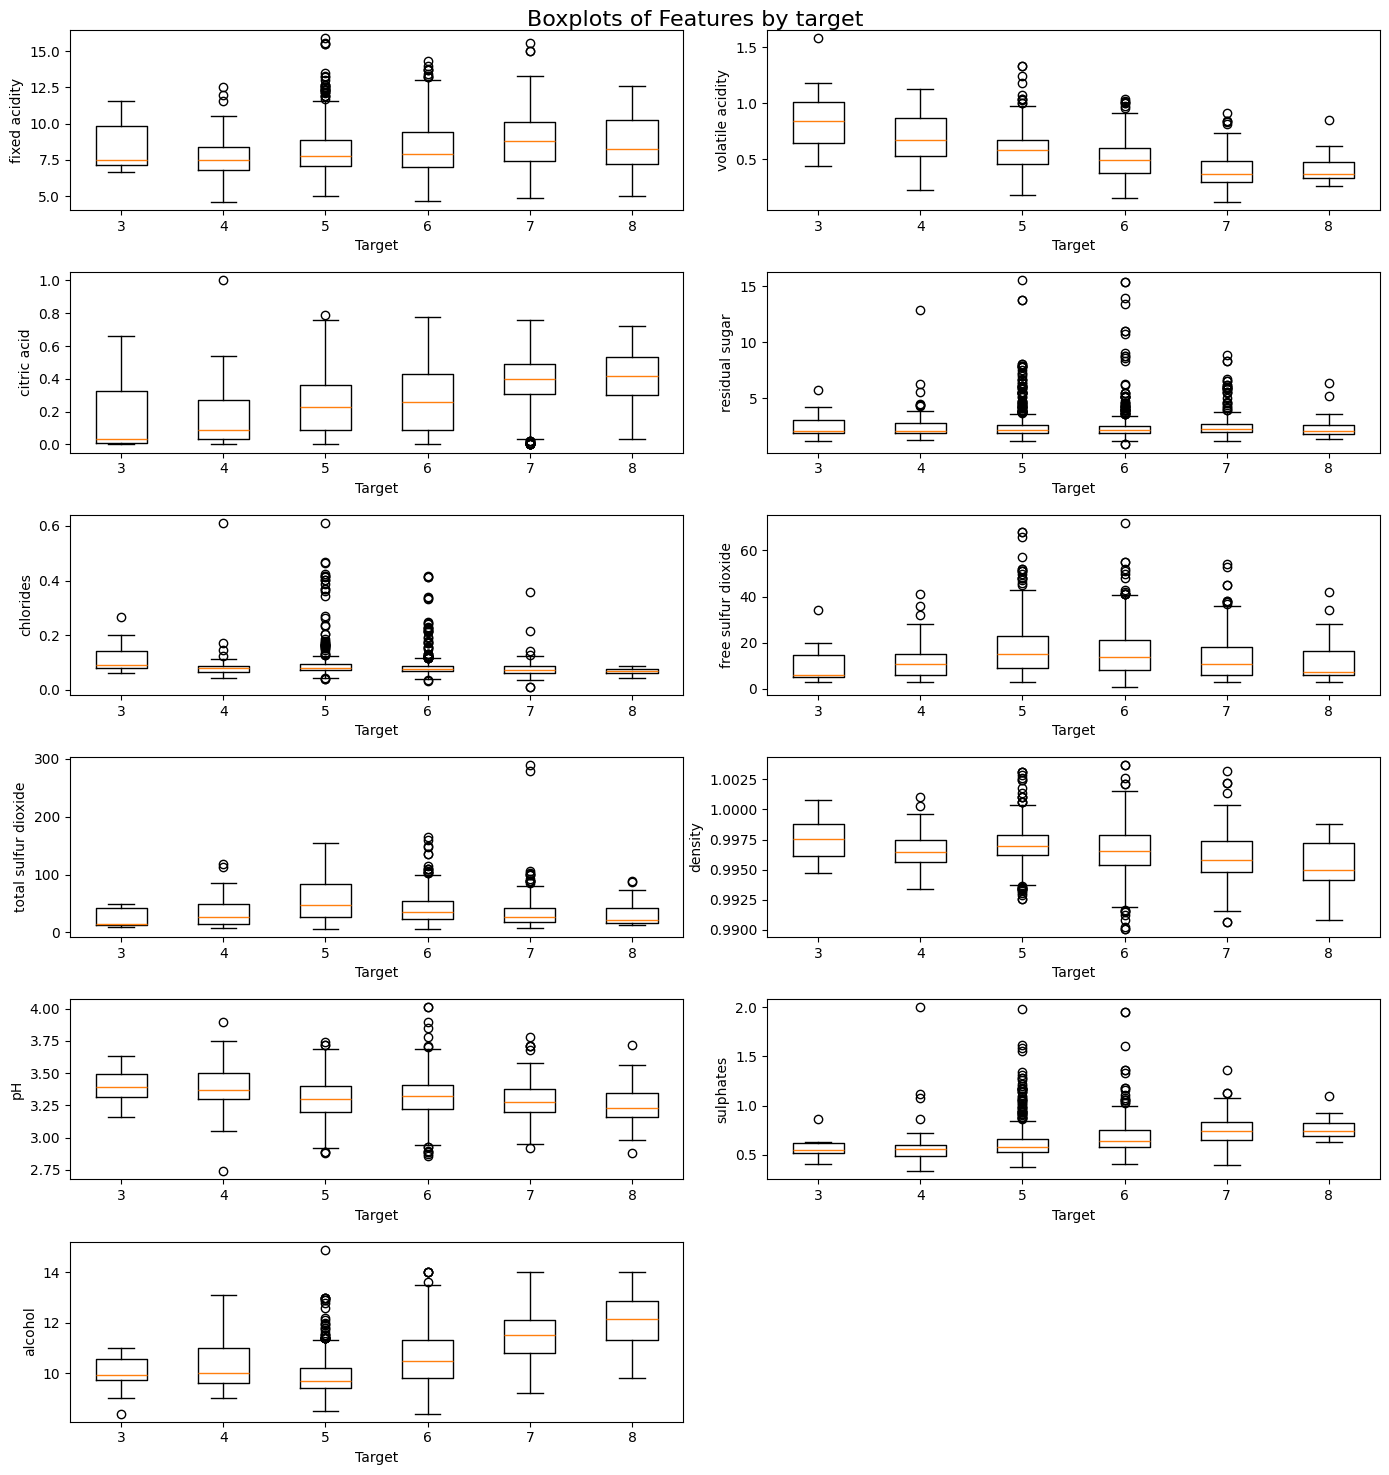

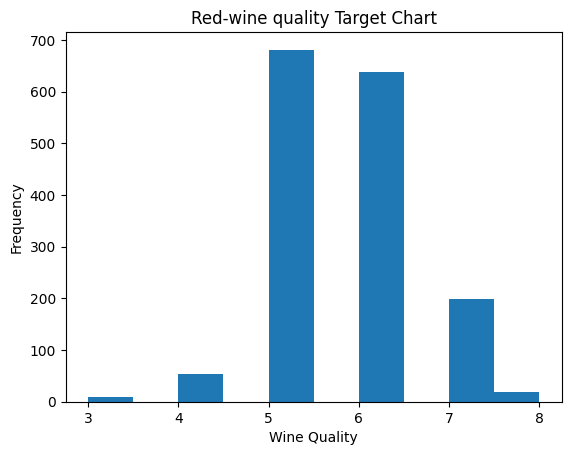

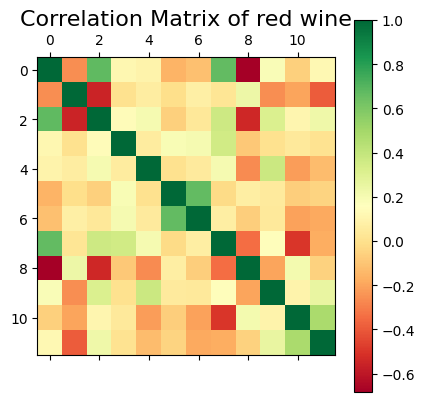

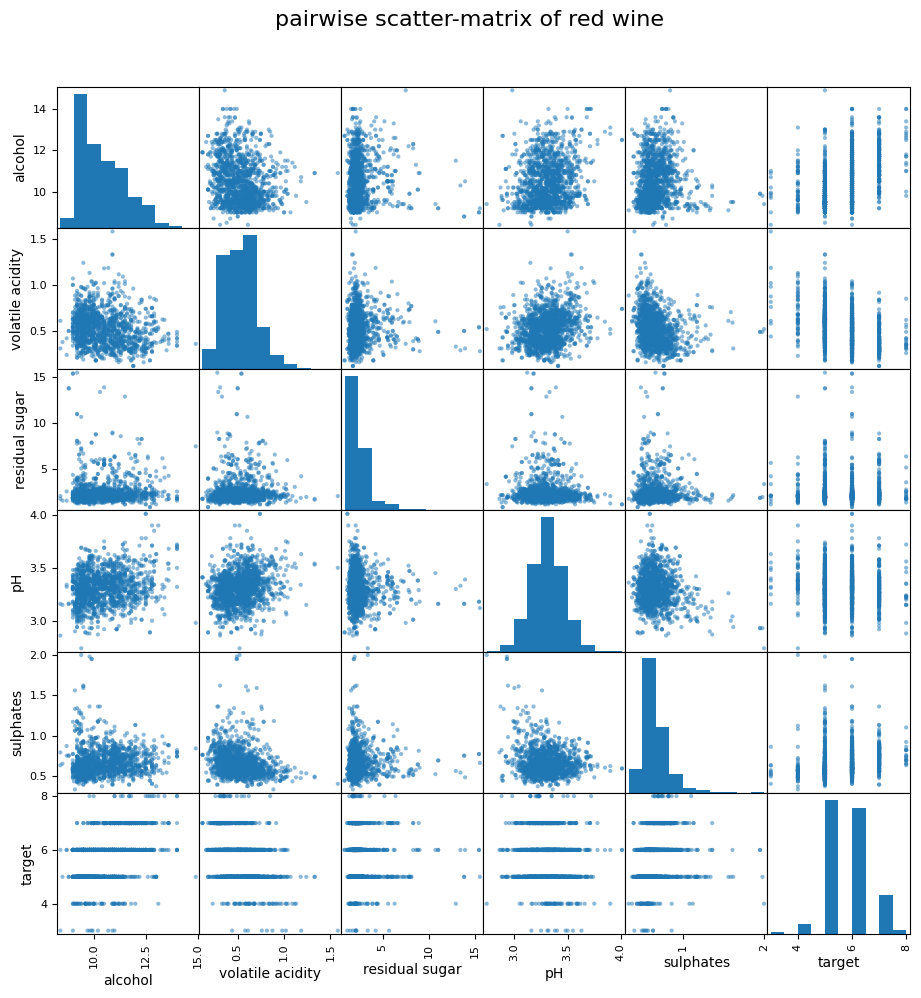

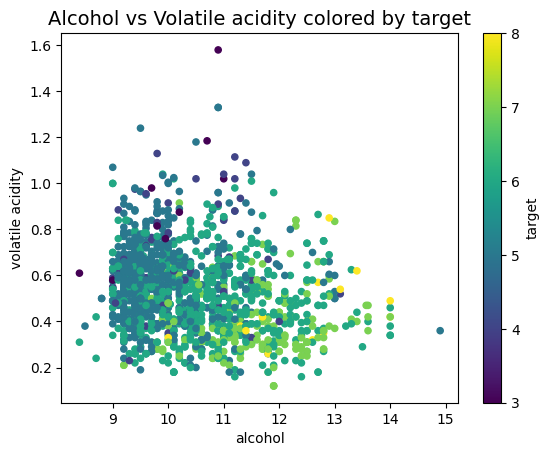

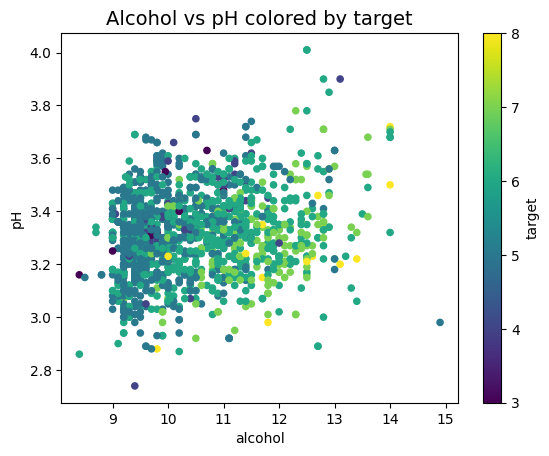

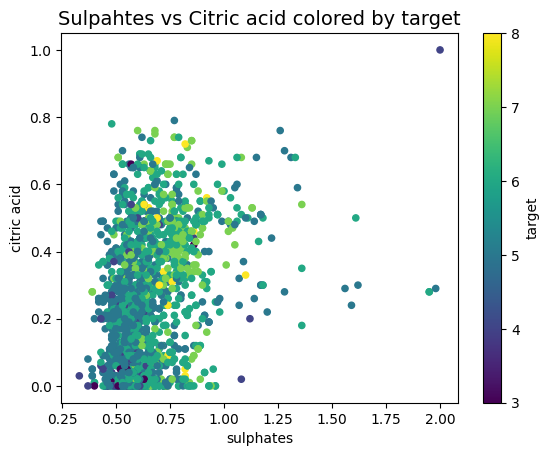

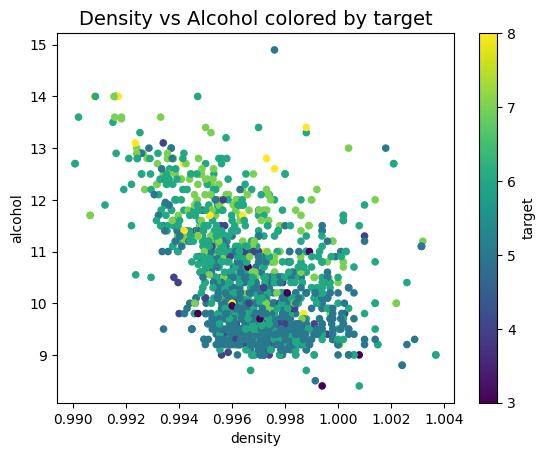

In [36]:
# YOUR CODE HERE
#EDA of Red wine data
#1. data loading:
print(df_redWine.shape)
df_redWine.head()

#2. Description:
df_inputs=df_redWine.drop("target", axis=1) #Inputs
print(df_inputs)
df_target=df_redWine["target"] #Target
print(df_target)
print("Dataset Information:")
df_redWine.info()
print("\nStatistical Analysis:")
display(df_redWine.describe())

#3. Check for missing values:
print("\n Missing values in columns")
print(df_redWine.isna().sum())

#4. Check for duplicates:
print("\n Duplicate values")
print(df_redWine.duplicated().sum())

#5. Univariate Analysis:
# Histogram for numeric features 
df_inputs.hist(figsize=(15,10), bins=20, grid=False)
plt.suptitle("Histogram of Features", fontsize=20)
plt.tight_layout()
plt.show()

#scatterplot vs target
columns=[c for c in df_redWine.columns if c != "target"]
#print(columns)
print("Scatterplot of features vs target")

for col in columns:
    plt.scatter(df_redWine[col], df_redWine["target"])
    plt.xlabel(col)
    plt.ylabel("target")
    plt.title(f"{col} and target")
    plt.tight_layout()
    plt.show()

#Boxplots using Target
targets= sorted(df_redWine["target"].unique())
rows=int(np.ceil(len(columns)/2))
#print(rows)
plt.figure(figsize=(14,15))
for i, col in enumerate(columns,1):
    plt.subplot(rows,2,i)
    plot_data = [df_redWine[df_redWine["target"]==t][col].values for t in targets]
    plt.boxplot(plot_data, tick_labels=targets)
    plt.xlabel("Target")
    plt.ylabel(col)

plt.suptitle("Boxplots of Features by target", fontsize=16)
plt.tight_layout()
plt.show()

#6. Class balance
f= pd.DataFrame(df_redWine)
df_redWine["target"].plot.hist(bins=10,title="Red-wine quality Target Chart")
plt.xlabel("Wine Quality")
plt.show()

#7. Multivariate Analysis
#Correlation Matrix
matrix=df_redWine.corr(numeric_only=True)
plt.matshow(df_redWine.corr(numeric_only=True),cmap="RdYlGn")
plt.title("Correlation Matrix of red wine", fontsize = 16)
plt.colorbar()
plt.show()

#pairwise scatter-matrix
input_cols=["alcohol","volatile acidity", "residual sugar", "pH","sulphates","target"]
pd.plotting.scatter_matrix(df_redWine[input_cols],figsize=(11,11), alpha=0.5)
plt.suptitle("pairwise scatter-matrix of red wine", fontsize = 16, y=0.95)
plt.show()

#3-feature relationship plots:
df_redWine.plot.scatter("alcohol", "volatile acidity", c="target", cmap="viridis")
plt.title("Alcohol vs Volatile acidity colored by target", fontsize = 14)
plt.show()
df_redWine.plot.scatter("alcohol", "pH", c="target", cmap="viridis")
plt.title("Alcohol vs pH colored by target", fontsize = 14)
plt.show()
df_redWine.plot.scatter("sulphates", "citric acid", c="target", cmap="viridis")
plt.title("Sulpahtes vs Citric acid colored by target", fontsize = 14)
plt.show()
df_redWine.plot.scatter("density", "alcohol", c="target", cmap="viridis")
plt.title("Density vs Alcohol colored by target", fontsize = 14)
plt.show()

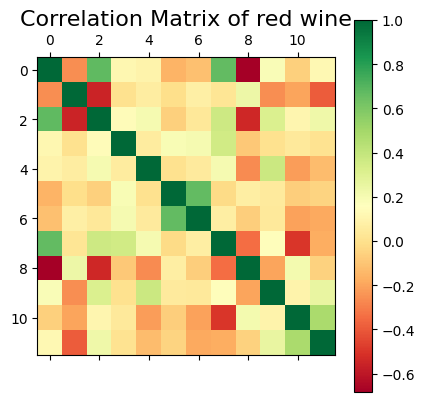

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [37]:
#Running three Individual Charts:
#Chart 1:Correlation Matrix
matrix=df_redWine.corr(numeric_only=True)
plt.matshow(df_redWine.corr(numeric_only=True),cmap="RdYlGn")
plt.title("Correlation Matrix of red wine", fontsize = 16)
plt.colorbar()
plt.show()

#correlated data
df_redWine.corr(numeric_only=True)

Why chart1 is interesting?

 Correlation matrix chart is interesting for Red wine dataset as it shows which chemical component(alcohol, ph, sulphates, volatile acidity) of red wine influence the wine quality or the target variable. Alcohol shows a strong positive correlation with target. Volatile acidity shows a negetive correlation with target. Sulphates shows moderate positive correlation with target. It also reveals multi collinearity between different features. Free sulfur dioxide and total sulfur dioxide strongly correlate with each other. Fixed acidity and citric acid combined with pH also strogly correlate with each other. Strong linear correlation indicates linear model will work well.

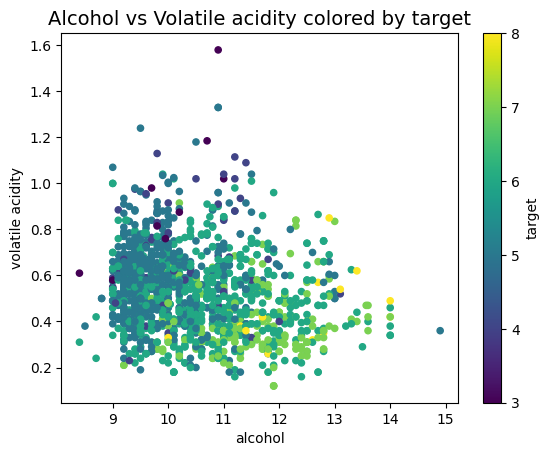

In [38]:
#Chart 2:3-feature relationship plots:
df_redWine.plot.scatter("alcohol", "volatile acidity", c="target", cmap="viridis")
plt.title("Alcohol vs Volatile acidity colored by target", fontsize = 14)
plt.show()

Why chart2 is interesting?

This chart shows two strong predictors of red wine quality and how their combined effect infulences red wine quality. Alcohol is the most positively correlated and volatile acidity the most negetively correlated features with the target. These shows real world wine chemistry. Color encoding by the target reflects clear patterns of high quality wine(high alcohol+low volatile acidity) and low quality wine(low alcohol+high valatile acidity). It helps to identify the outliers. The clear patterns indicates the support of linear regression.

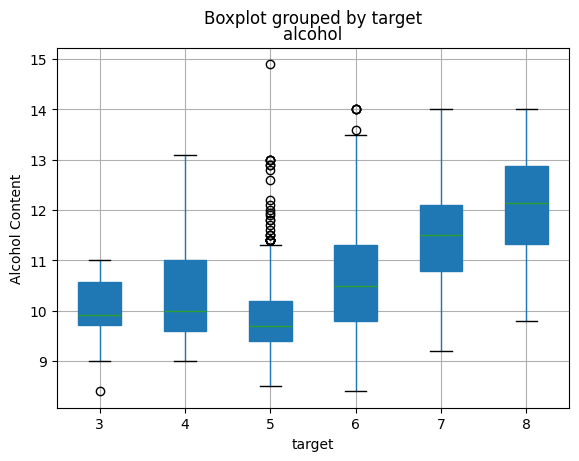

In [39]:
#Chart 3: Boxplot of Alcohol column grouped by target
df_redWine.boxplot(column="alcohol", by="target", patch_artist=True)
plt.ylabel("Alcohol Content")
plt.show()


Why chart3 is interesting?

This chart shows the districution of alcohol content across different wine quality(target) level. Grouping alcohol by target, the chart reveals median alcohol content increases as target increases, higher quality wines have higher alcohol content refelecting alcohol feature is a storng predictor. Boxplot visualizes the variability(median, outlier,spread) and overlap between quality level. The variablity helps us to understand the consistency of alcohol level within each target group. The overlap between adjacent target level reflects exact target score prediction is difficult and regression will be correct approach for analaysis rather than classification model.

### Problem 4 (5 points)

Plot the correlation matrix of the numeric columns in the data set.
Which pair of different columns were highlighted as the most correlated?

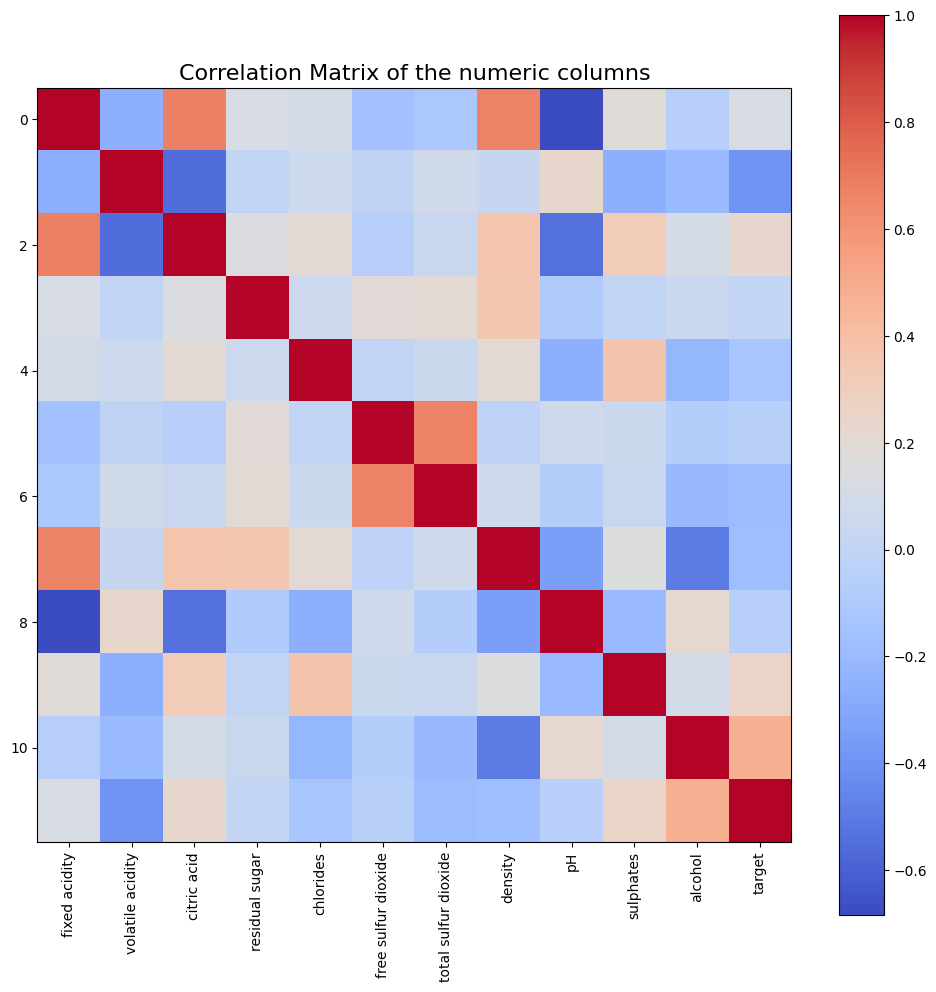

In [40]:
# YOUR CODE HERE
c= df_redWine.corr()
plt.figure(figsize=(10,10))
plt.imshow(c, cmap="coolwarm", interpolation="nearest")
plt.colorbar()
plt.xticks(range(len(c.columns)), c.columns, rotation=90)
plt.xticks(range(len(c.columns)), c.columns)
plt.title("Correlation Matrix of the numeric columns", fontsize = 16)
plt.tight_layout()
plt.show()


YOUR ANSWERS HERE:

In the red wine dataset the highest correlated features are total sulfur dioxide and free sulfur dioxide(correlation strong positive). Total SO2 is composed of free SO2 and bound SO2. When free SO2 increases total SO2 will also increase proportionally.

### Problem 5 (10 points)

Pick three different regression model classes to try in problem 6 from the scikit-learn documentation.
For each class, provide a link to the scikit-learn documentation, and a link to another web page describing how that kind of model works.
The second link should not be from scikit-learn, but Wikipedia is acceptable.
You do not need to understand the methods at this time, but it is good to be comfortable researching them.

In [41]:
# YOUR CODE HERE


YOUR ANSWERS HERE

Picked three different regression model

1. Linear Regression(Ordinary Least Square)
# Link to the scikit-learn documentation: https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares
# Link to another web page: https://en.wikipedia.org/wiki/Ordinary_least_squares

2. Ridge Regression
# Link to the scikit-learn documentation: https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression-and-classification
# Link to another web page: https://en.wikipedia.org/wiki/Ridge_regression

3. Lasso Regression
# Link to the scikit-learn documentation: https://scikit-learn.org/stable/modules/linear_model.html#lasso
# Link to another web page: https://www.mygreatlearning.com/blog/understanding-of-lasso-regression/

### Problem 6 (50 points)

Build three different regression models using the entire data set.
Plot the actual target vs the predicted values for each in one chart.
Compute the L2 and L1 losses for each of them.
You may use any regression class provided provided by scikit-learn, and you may reuse one class as long as you change its parameters enough to see different results.

Evaluate Models using test train split
Linear
L1 train Losses:  0.499620
L1 test Losses:  0.503530
 L2 train Losses:  0.424191
 L2 test Losses:  0.390025
Ridge
L1 train Losses:  0.502084
L1 test Losses:  0.512763
 L2 train Losses:  0.429650
 L2 test Losses:  0.403830
Lasso
L1 train Losses:  0.500163
L1 test Losses:  0.506740
 L2 train Losses:  0.425163
 L2 test Losses:  0.394325
-------------------------------------------------------------------------------------

                        Actual target vs the predicted values using full dataset


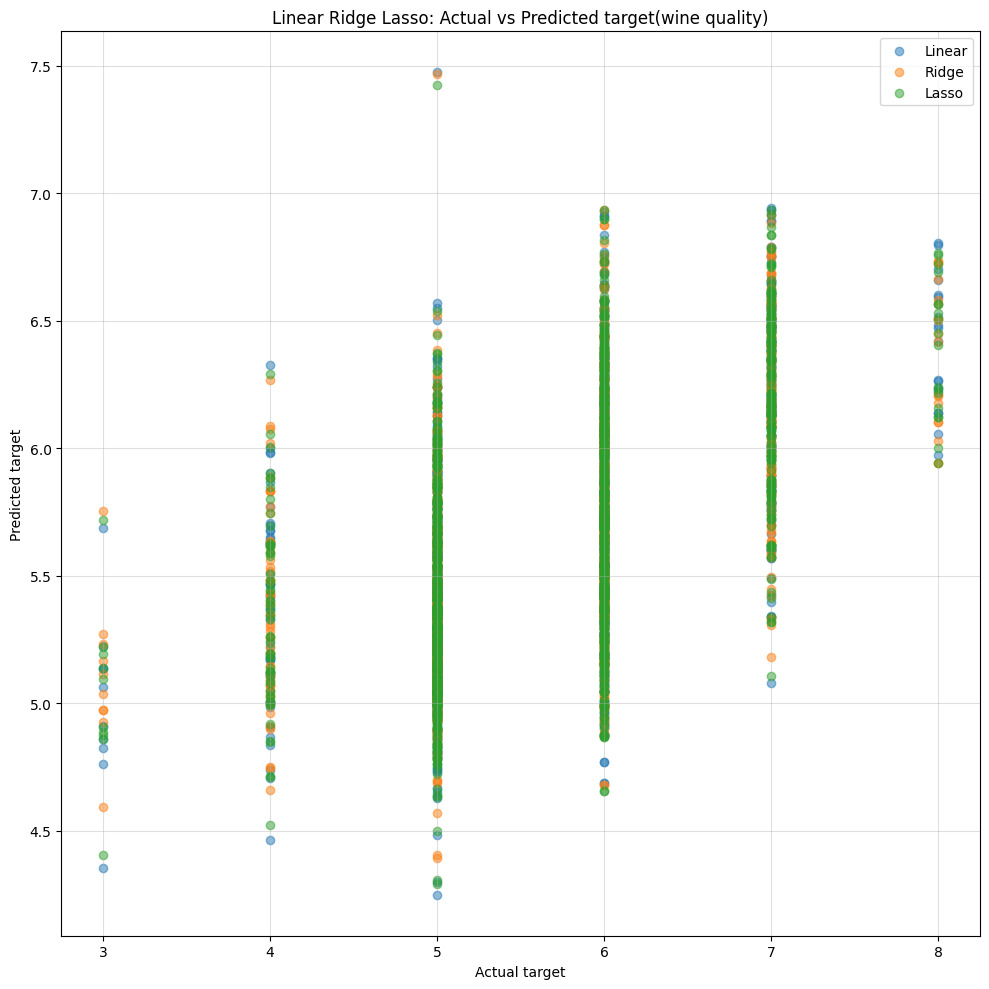

-------------------------------------------------------------------------------------

L1 L2 losses output of fulldataset by models
Linear
L1 Losses:  0.500490
 L2 Losses:  0.416767
Ridge
L1 Losses:  0.503780
 L2 Losses:  0.421933
Lasso
L1 Losses:  0.501617
 L2 Losses:  0.417938


In [42]:
# YOUR CODE HERE
#building Linear Regression, Ridge Regression and Lasso Regression models
#Set input and target
X= df_redWine.drop("target", axis=1).values #inputs
y= df_redWine["target"].values #target

#Split into train and test
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    X, y, test_size=0.2, random_state=42
)

#dictionaries to store the train test losses
train_L1 = {}
train_L2 = {}
test_L1 = {}
test_L2 = {}

#Build linear regression, Ridge regression and Lasso regression models
#dictionary to store the models
Linear_Models={"Linear": sklearn.linear_model.LinearRegression(),
               "Ridge": sklearn.linear_model.Ridge(alpha=8.0),
               "Lasso": sklearn.linear_model.Lasso(alpha=0.001)}

#fit and evaluate models 
for key, model in Linear_Models.items():
    model.fit(X_train,y_train)

    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)

    #L1 and L2 train losses
    train_L1[key] = np.mean(np.abs(y_train-y_train_pred))
    train_L2[key] = np.mean((y_train-y_train_pred)**2)

    #L1 and L2 test losses
    test_L1[key] = np.mean(np.abs(y_test-y_test_pred))
    test_L2[key] = np.mean((y_test-y_test_pred)**2)

#L1 L2 train test losses output by models
print("Evaluate Models using test train split")
for key in Linear_Models:
    print(key)
    print(f"L1 train Losses: {train_L1[key]: 3f}")
    print(f"L1 test Losses: {test_L1[key]: 3f}")
    print(f" L2 train Losses: {train_L2[key]: 3f}")
    print(f" L2 test Losses: {test_L2[key]: 3f}")

print("-------------------------------------------------------------------------------------\n")

#dictionaries to store the predtions and losses for full dataset
predictions_6 = {}
L1_loss_6 = {}
L2_loss_6 = {}

for key, model in Linear_Models.items():
    model.fit(X,y)  #Fitting full dataset in the models
    y_predict= model.predict(X) #predicting entire dataset
    predictions_6[key]=y_predict

    #L1 and L2 losses
    L1_loss_6[key] = np.mean(np.abs(y-y_predict))
    L2_loss_6[key] = np.mean((y-y_predict)**2)

#Ploting the actual target vs the predicted values 
plt.figure(figsize=(10,10))
print("                        Actual target vs the predicted values using full dataset")
for key, y_predict in predictions_6.items():
    plt.scatter(y, y_predict, alpha=0.5, label=key)

#plt.plot([y.min(), y.max()], [y.min(), y.max()], "k--", color="blue",label="Prediction line")
plt.xlabel("Actual target")
plt.ylabel("Predicted target")
plt.title("Linear Ridge Lasso: Actual vs Predicted target(wine quality)")
plt.legend()
plt.grid(alpha=0.4)
plt.tight_layout()
plt.show()

print("-------------------------------------------------------------------------------------\n")

#L1 L2 losses output by models
print("L1 L2 losses output of fulldataset by models")
for key in Linear_Models:
    print(key)
    print(f"L1 Losses: {L1_loss_6[key]: 3f}")
    print(f" L2 Losses: {L2_loss_6[key]: 3f}")





YOUR ANSWERS HERE

### Problem 7 (30 points)

Use 5-fold cross-validation to repeat building the same three kinds of regression models. Compare the L2 losses predicted by cross-validation against the L2 losses training against the whole data set. (The difference is likely from overfitting in the latter.)

In [43]:
# YOUR CODE HERE
#building Linear Regression, Ridge Regression and Lasso Regression models
#Set input and target
X= df_redWine.drop("target", axis=1).values #inputs
y= df_redWine["target"].values #target

#Build linear regression, Ridge regression and Lasso regression models for entire dataset
#dictionary to store the models
Linear_Models={"Linear": sklearn.linear_model.LinearRegression(),
               "Ridge": sklearn.linear_model.Ridge(alpha=8.0),
               "Lasso": sklearn.linear_model.Lasso(alpha=0.001)}


#dictionaries to store the predtions and losses
predictions = {}
L2_loss_cv = {}
L2_loss_full = {}

#5-fold cross-validation L2 loss
kf= sklearn.model_selection.KFold(n_splits=5, shuffle=True, random_state=42)

for key, model in Linear_Models.items():
    mse_score = sklearn.model_selection.cross_val_score(
        model, X, y,
        scoring="neg_mean_squared_error",
        cv=kf
    )
    L2_loss_cv[key]=-np.mean(mse_score)

#L2 losses training against the whole data set
for key, model in Linear_Models.items():
    model.fit(X,y)  #Fitting full dataset in the models
    y_predict= model.predict(X) #predicting entire dataset
    predictions[key]=y_predict

    #L2 losses
    L2_loss_full[key] = np.mean((y-y_predict)**2)

#Compare the losses
for key in Linear_Models:
    print(key)
    print(f"Cross Validation L2 Losses: {L2_loss_cv[key]: 3f}")
    print(f" Full dataset L2 Losses: {L2_loss_full[key]: 3f}")


Linear
Cross Validation L2 Losses:  0.428763
 Full dataset L2 Losses:  0.416767
Ridge
Cross Validation L2 Losses:  0.431110
 Full dataset L2 Losses:  0.421933
Lasso
Cross Validation L2 Losses:  0.429264
 Full dataset L2 Losses:  0.417938


Analysis: Full dataset loss is lower compared to CV loss. Gaps(full-cv) are small so no indication of strong overfitting. Ridge slightly reduces the gap indicating better stability.

### Problem 8 (25 points)

Build three different regression models as in problem 6, but preprocess the data so that each column has mean zero and standard deviation one first.
For full credit, use a scikit-learn pipeline for each model.
For each model, compare the L2 losses -- which of them performed differently from your results in problem 6?

(This process will be covered in week 13.)

In [44]:
# YOUR CODE HERE
#building Linear Regression, Ridge Regression and Lasso Regression models
#Set input and target
X= df_redWine.drop("target", axis=1).values #inputs
y= df_redWine["target"].values #target

#Build linear regression, Ridge regression and Lasso regression models with standardization for entire dataset
#dictionary to store the models
Linear_Models={"Linear": sklearn.pipeline.Pipeline([
    ("Scaler", sklearn.preprocessing.StandardScaler()),
    ("reg", sklearn.linear_model.LinearRegression())]),
    
    "Ridge": sklearn.pipeline.Pipeline([
    ("Scaler", sklearn.preprocessing.StandardScaler()),
    ("reg", sklearn.linear_model.Ridge(alpha=8.0))]),
            
    "Lasso": sklearn.pipeline.Pipeline([
    ("Scaler", sklearn.preprocessing.StandardScaler()),
    ("reg", sklearn.linear_model.Lasso(alpha=0.001))])
}

#dictionaries to store the predtions and losses
predictions_8 = {}
L2_loss_8 = {}

#Train the dataset
for key, model in Linear_Models.items():
    model.fit(X,y)  #Fitting full dataset in the models
    y_predict= model.predict(X) #predicting entire dataset
    predictions_8[key]=y_predict
    L2_loss_8[key]= np.mean((y-y_predict)**2) #calculating L2 losses

#Compare the losses
for key in Linear_Models:
    print(key)
    print(f" Full dataset L2 Losses: {L2_loss_8[key]: 5f}")


Linear
 Full dataset L2 Losses:  0.416767
Ridge
 Full dataset L2 Losses:  0.416774
Lasso
 Full dataset L2 Losses:  0.416796


YOUR ANSWERS HERE

L2 losses Output from problem 6:
Linear L2 Losses:  0.416767
Ridge L2 Losses:  0.421933
Lasso L2 Losses:  0.417938

L2 losses Output from problem 8:
Linear L2 Losses:  0.416767
Ridge L2 Losses:  0.416774
Lasso L2 Losses:  0.416796

We can see Ridge and Lasso performed differently in problem 8.

### Problem 9 (5 points)

A colleague suggests that you find better models by repeatedly building decision trees with random depth limits.
They say that trying 1000 such models will likely find an improvement as long as you use cross validation.
Give a one sentence response to this suggestion. 

In [45]:
# YOUR CODE HERE


YOUR ANSWERS HERE

Building 1000 decision trees with random depth limits is not efficient as decision trees model will overfit and radom hyperparameter search will show very small improvement even with cross validation.

### Problem 10 (10 points)

Pick a best model from all the models that you built and otherwise described in this project.
Explain how you picked it, including what criteria you chose, and how the other models compared by that criteria.
As much as possible, justify that problem in the context of the original data set. 

In [46]:
# YOUR CODE HERE


YOUR ANSWERS HERE
I would select Linear Regression as the best performing model based on the performance analysis from "Test L2 Loss(MSE) from "train-test split" and "5-cross-fold-validation". Since the "target"(wine quality) value is numeric L2 loss is the strongest measure to compare different regression models and it is the best way to predict unseen data.

The reason Linear regression would fit perfectly for the "Red Wine" dataset because 1. the dataset represents stong linear relationships between chemical attributes and wine quality, 2. collinearity is moderate and it won't weaken the linear regression, 3. A smooth distributed target variable with mostly quantity score falling between 3-8.

Many attributes correlate nearly linearly with the target, for example, high alcohol content increases quality, increase in volatile acidity decreases wine the quality, sulphate and citric acid demonstrate modest positive linear correlation. When the dataset is simple, smooth and not overfitting the simplest model performs best.

Linear Regression is the best performing model as it achieved the lowest test L2 loss and lowest cross-validation L2 lossed among all three models.

Summary of model performance:
Linear:
 L2 train Losses:  0.424191
 L2 test Losses:  0.390025
 Cross Validation L2 Losses:  0.428763
 Full dataset L2 Losses:  0.416767

Ridge(alpha=8.0): 
 L2 train Losses:  0.429650
 L2 test Losses:  0.403830
 Cross Validation L2 Losses:  0.431110
 Full dataset L2 Losses:  0.421933

Lasso(alpha=0.001)
 L2 train Losses:  0.425163
 L2 test Losses:  0.394325
 Cross Validation L2 Losses:  0.429264
 Full dataset L2 Losses:  0.417938

In train-test analysis,
Linear regression shows best generalization due to true relationship between predictors and target is largely linear and low-complexity. It has the lowest test L2 score(0.39), train-test errors are very close which indicates low bias and low variance.

Ridge regression penalizes large coefficients. It helps with noisy features, but red wine data is well behaved. Ridge adds bias by shrinking coefficient.

Lasso regression can zero-out irrelevant features. Since in this dataset most of the features indicate some linear signal, Lasso risks deleting necessary predictors resulting slightly worse test performance.

So more complex and regularized models(Lasso, Ridge) over-penalize the coefficient, regularizations give little advantage. Linear regression provides simplest, most accurate, less complex, most interpretable analysis for the dataset.